In [13]:
# Cleaning the data

import pandas as pd
import numpy as np
from collections import Counter

inputDF = pd.read_csv('londonlistings.csv')

len(inputDF)

77096

In [2]:
inputDF = pd.read_csv('londonlistings.csv')
inputDF=inputDF[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview',
                 'neighbourhood_cleansed','host_id','host_name','host_since', 'host_response_time','street', 'zipcode',
                 'review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds',
                 'reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]

In [3]:
# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.reviews_per_month > 0]
inputDF = inputDF[inputDF.accommodates  > 0]
inputDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
3,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,"Open from June 2018 after a 3-year break, we a...",-0.140024,51.520982,Ready again from June 2018 for bookings after ...,"Open from June 2018 after a 3-year break, we a...",f,"Location, location, location! You won't find b...",Westminster,...,Entire home/apt,6,2.0,3.0,3.0,0.42,"{TV,Wifi,Kitchen,""Paid parking off premises"",E...",strict_14_with_grace_period,39,300.0
4,24328,Battersea 2 bedroom house & parking,"Artist house, high ceiling bedrooms, private p...",-0.163764,51.472981,- End of terrace two bedroom house close to So...,"Artist house, high ceiling bedrooms, private p...",f,"- Battersea is a quiet family area, easy acces...",Wandsworth,...,Entire home/apt,4,1.5,2.0,2.0,0.94,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",strict_14_with_grace_period,92,150.0
5,25023,All-comforts 2-bed flat near Wimbledon tennis,"Large, all comforts, 2-bed flat; first floor; ...",-0.218744,51.446872,10 mins walk to Southfields tube and Wimbledon...,"Large, all comforts, 2-bed flat; first floor; ...",f,This is a leafy residential area with excellen...,Wandsworth,...,Entire home/apt,4,1.0,2.0,2.0,0.77,"{TV,Wifi,Kitchen,""Free parking on premises"",El...",moderate,26,65.0
6,25123,Clean big Room in London (Room 1),Big room with double bed/ clean sheets/ clean ...,-0.209060,51.572243,Big double Room to let up to 6 months or more....,Big room with double bed/ clean sheets/ clean ...,t,Barnet is one of the largest boroughs in Londo...,Barnet,...,Private room,2,1.5,1.0,1.0,1.12,"{Wifi,Kitchen,""Buzzer/wireless intercom"",Heati...",strict_14_with_grace_period,118,29.0
7,26682,"Bright, comfortable flat in Chelsea","A single bedroom in a high-ceilinged, fully-eq...",-0.185547,51.485037,"This is a spare bedroom in a flat in Chelsea, ...","A single bedroom in a high-ceilinged, fully-eq...",f,Chelsea is a pleasant and desirable area which...,Kensington and Chelsea,...,Private room,1,1.0,1.0,1.0,0.05,"{TV,Internet,Wifi,Kitchen,""Pets allowed"",Break...",moderate,5,75.0


In [4]:
# Categorizing differernt listings based on room_type

roomType_DF=inputDF.groupby('room_type').id.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF=roomType_DF.rename(columns={'id':'number_of_Listings'})
roomType_DF


,room_type,number_of_Listings
0,Entire home/apt,28664
1,Private room,22423
2,Shared room,458


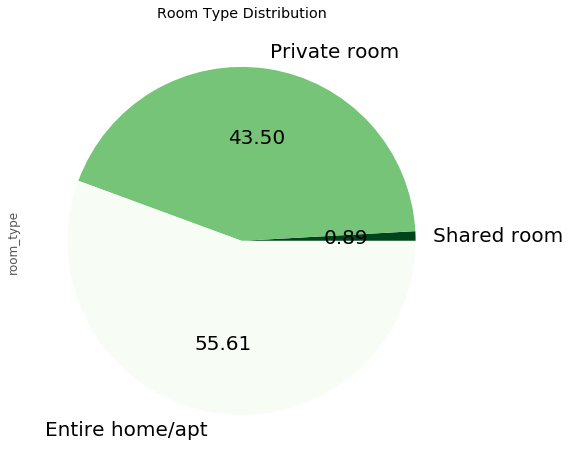

In [6]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

room = inputDF.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Greens_r', 
                 figsize=(10,8), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')
plt.savefig("Room Type Distribution1.png")
plt.show()

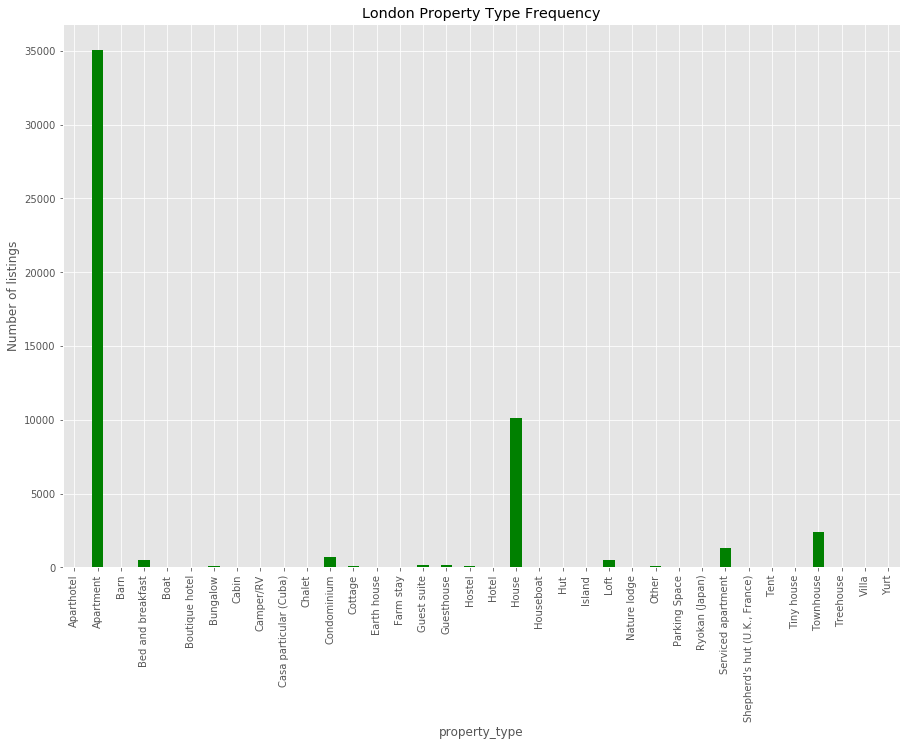

In [7]:
# Analyzing and plotting the number of listings based on their property type

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

propertytype_DF = inputDF.groupby('property_type').id.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype_DF['property_type']
y_pos = propertytype_DF['Number_Of_Listings']

propertytype_DF.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = 'green', 
           figsize =(15,10), 
           title = 'London Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('Number of listings')
plt.savefig("London Property Type Frequency.png")

#### Now analyzing the prices for different room type and property type.

In [8]:
# analyzing the prices for different room type and property type

roomProperty_DF = inputDF.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
45,Houseboat,Entire home/apt,255.000000
70,Villa,Entire home/apt,241.818182
66,Townhouse,Entire home/apt,210.431791
59,Serviced apartment,Entire home/apt,203.463740
42,House,Entire home/apt,192.465563


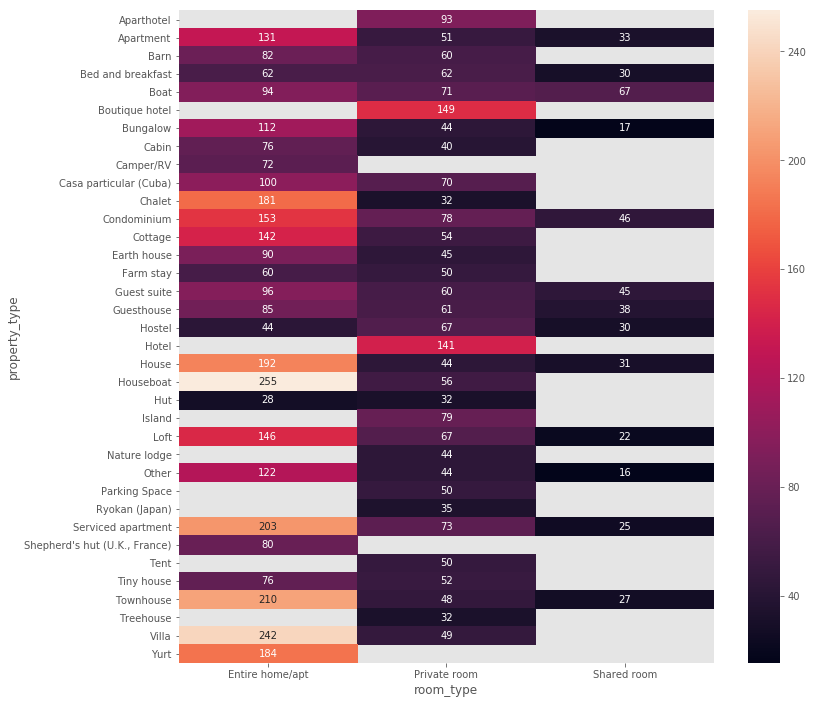

In [9]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(inputDF.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")
plt.savefig("heatmap1.png")

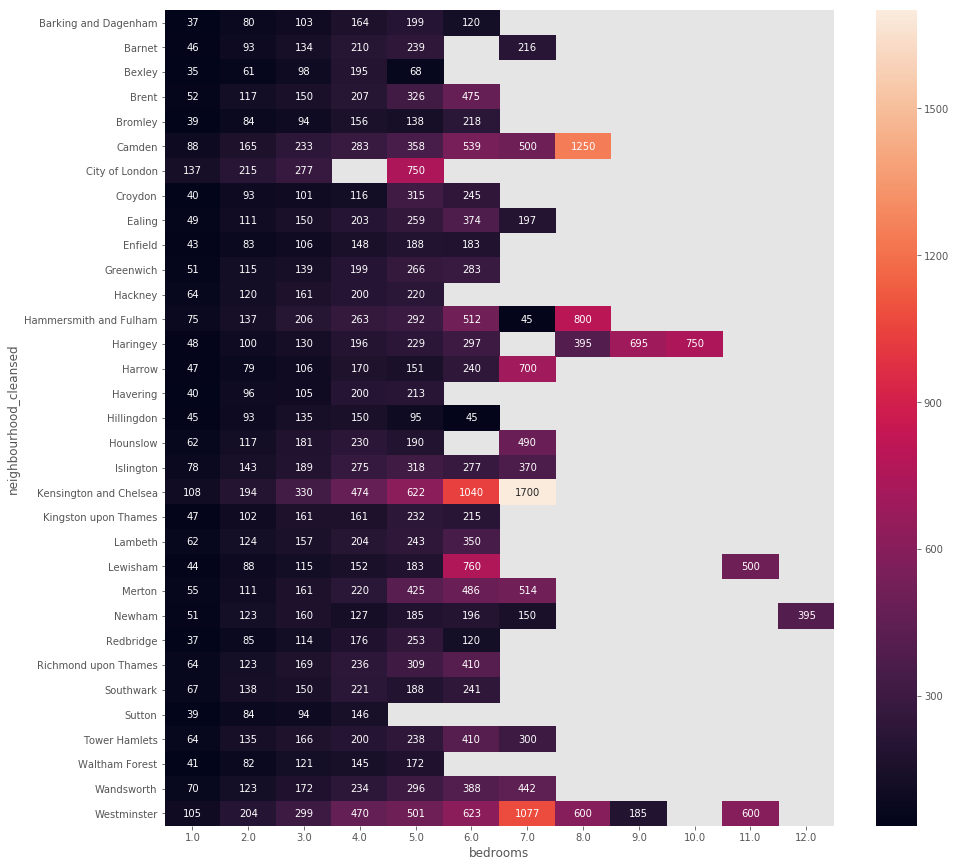

In [10]:
# HeatMap for variation of prices with number of bedrooms for listings

plt.figure(figsize=(15,15))
sns.heatmap(inputDF.groupby([
        'neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")
plt.savefig("heatmap2.png")

In [11]:
summaryDF = inputDF[['summary','price']]
summaryDF = summaryDF[pd.notnull(summaryDF['summary'])]
summaryDF = summaryDF[summaryDF['summary']!=0]
summaryDF = summaryDF.sort_values('price',ascending=[0])
top100DF = summaryDF.head(100)
top100DF.head()

,summary,price
17549,"A quiet, clean, harmonious 2 bedroom flat (1 r...",7175.0
5406,"This spacious top floor property, built in 200...",7000.0
4527,This Large Double Four Poster Bedroom with ens...,6560.0
38569,"Located in prime Central London, overlooking t...",6000.0
12798,"Cosy, refurbished Victoria era flat for those ...",5000.0


In [12]:
from nltk.corpus import stopwords
import string
import nltk

words=''
for index,row in top100DF.iterrows():
    words += row['summary']
    
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

'quiet clean harmonious bedroom flat room available'

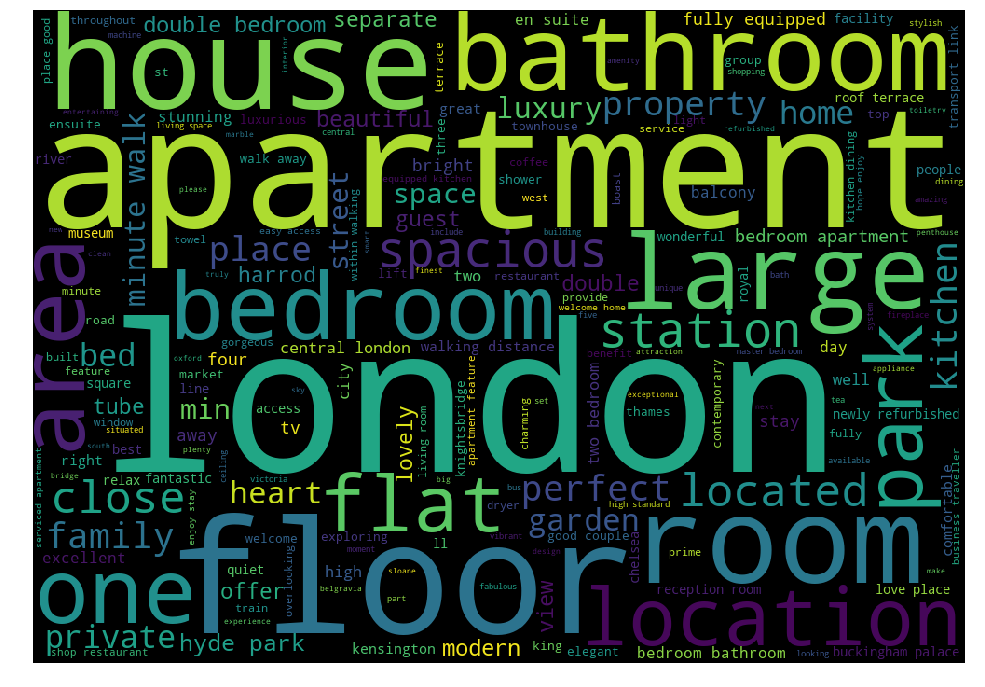

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [14]:
#Analyzing what amenities costs more ?
import re

amenitiesDF = inputDF[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

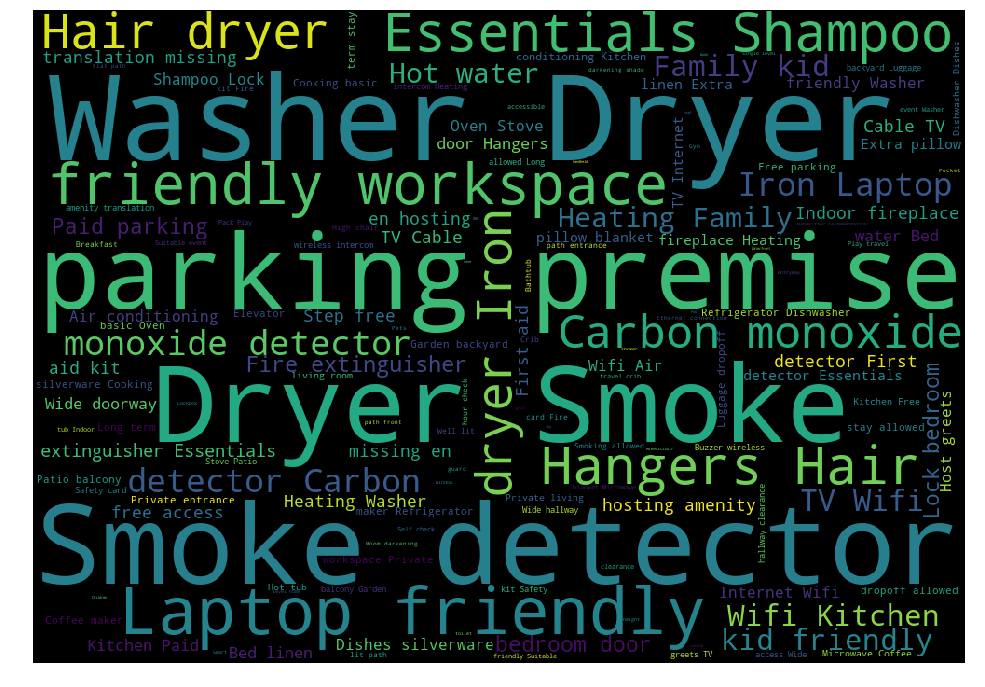

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(allemenities_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

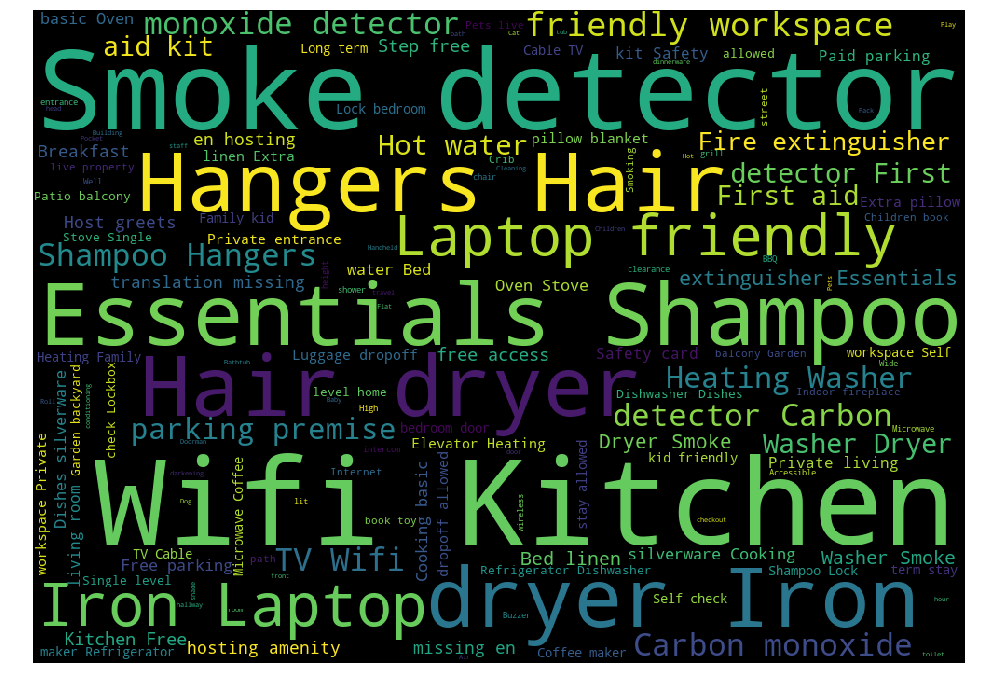

In [16]:
amenitiesDFbott =amenitiesDF.sort_values('price',ascending=[1])
amenitiesDFbottom=amenitiesDFbott.head(30)

allemenitiesb = ''
for index,row in amenitiesDFbottom.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenitiesb+=p

allemenities_datab=nltk.word_tokenize(allemenitiesb)
filtered_datab=[word for word in allemenities_datab if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_datab=[wnl.lemmatize(data) for data in filtered_datab]
allemenities_wordsb=' '.join(allemenities_datab)
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(allemenities_wordsb)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [17]:
# Average prices for each type of listing

avgPrice_DF=inputDF.groupby('room_type').price.mean()
avgPrice_DF=avgPrice_DF.reset_index()
avgPrice_DF=avgPrice_DF.rename(columns={'price':'average_Price'})
avgPrice_DF

,room_type,average_Price
0,Entire home/apt,143.640106
1,Private room,50.188958
2,Shared room,31.908297


In [18]:


home = inputDF[(inputDF.room_type == 'Entire home/apt')]
private = inputDF[(inputDF.room_type == 'Private room')]
shared = inputDF[(inputDF.room_type == 'Shared room')]

location_home = home[['latitude', 'longitude']]
location_private = private[['latitude', 'longitude']]
location_shared = shared[['latitude', 'longitude']]

In [19]:
# grouping neighbourhood by number of listings

neighbourhood_DF=home.groupby('neighbourhood_cleansed').id.count()
neighbourhood_DF=neighbourhood_DF.reset_index()
neighbourhood_DF=neighbourhood_DF.rename(columns={'id':'Number_Of_Listings'})
neighbourhood_DF=neighbourhood_DF.sort_values('Number_Of_Listings',ascending=[0])
neighbourhood_DF.head()

,neighbourhood_cleansed,Number_Of_Listings
32,Westminster,3959
19,Kensington and Chelsea,2692
29,Tower Hamlets,2546
5,Camden,2390
11,Hackney,2277


In [20]:
# grouping neighbourhood by average price of listings

neighbourhoodPrice_DF=home.groupby('neighbourhood_cleansed').price.mean()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.reset_index()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.rename(columns={'price':'Average_Price'})
neighbourhoodPrice_DF=neighbourhoodPrice_DF.sort_values('Average_Price',ascending=[0])
neighbourhoodPrice_DF.head()

,neighbourhood_cleansed,Average_Price
32,Westminster,197.547613
19,Kensington and Chelsea,193.202080
6,City of London,174.857143
5,Camden,160.527197
26,Richmond upon Thames,143.821159


In [21]:
#Merging above two dataframes

mergeDF=pd.merge(neighbourhood_DF,neighbourhoodPrice_DF,on='neighbourhood_cleansed')
mergeDF.head()

,neighbourhood_cleansed,Number_Of_Listings,Average_Price
0,Westminster,3959,197.547613
1,Kensington and Chelsea,2692,193.202080
2,Tower Hamlets,2546,124.194423
3,Camden,2390,160.527197
4,Hackney,2277,115.357488


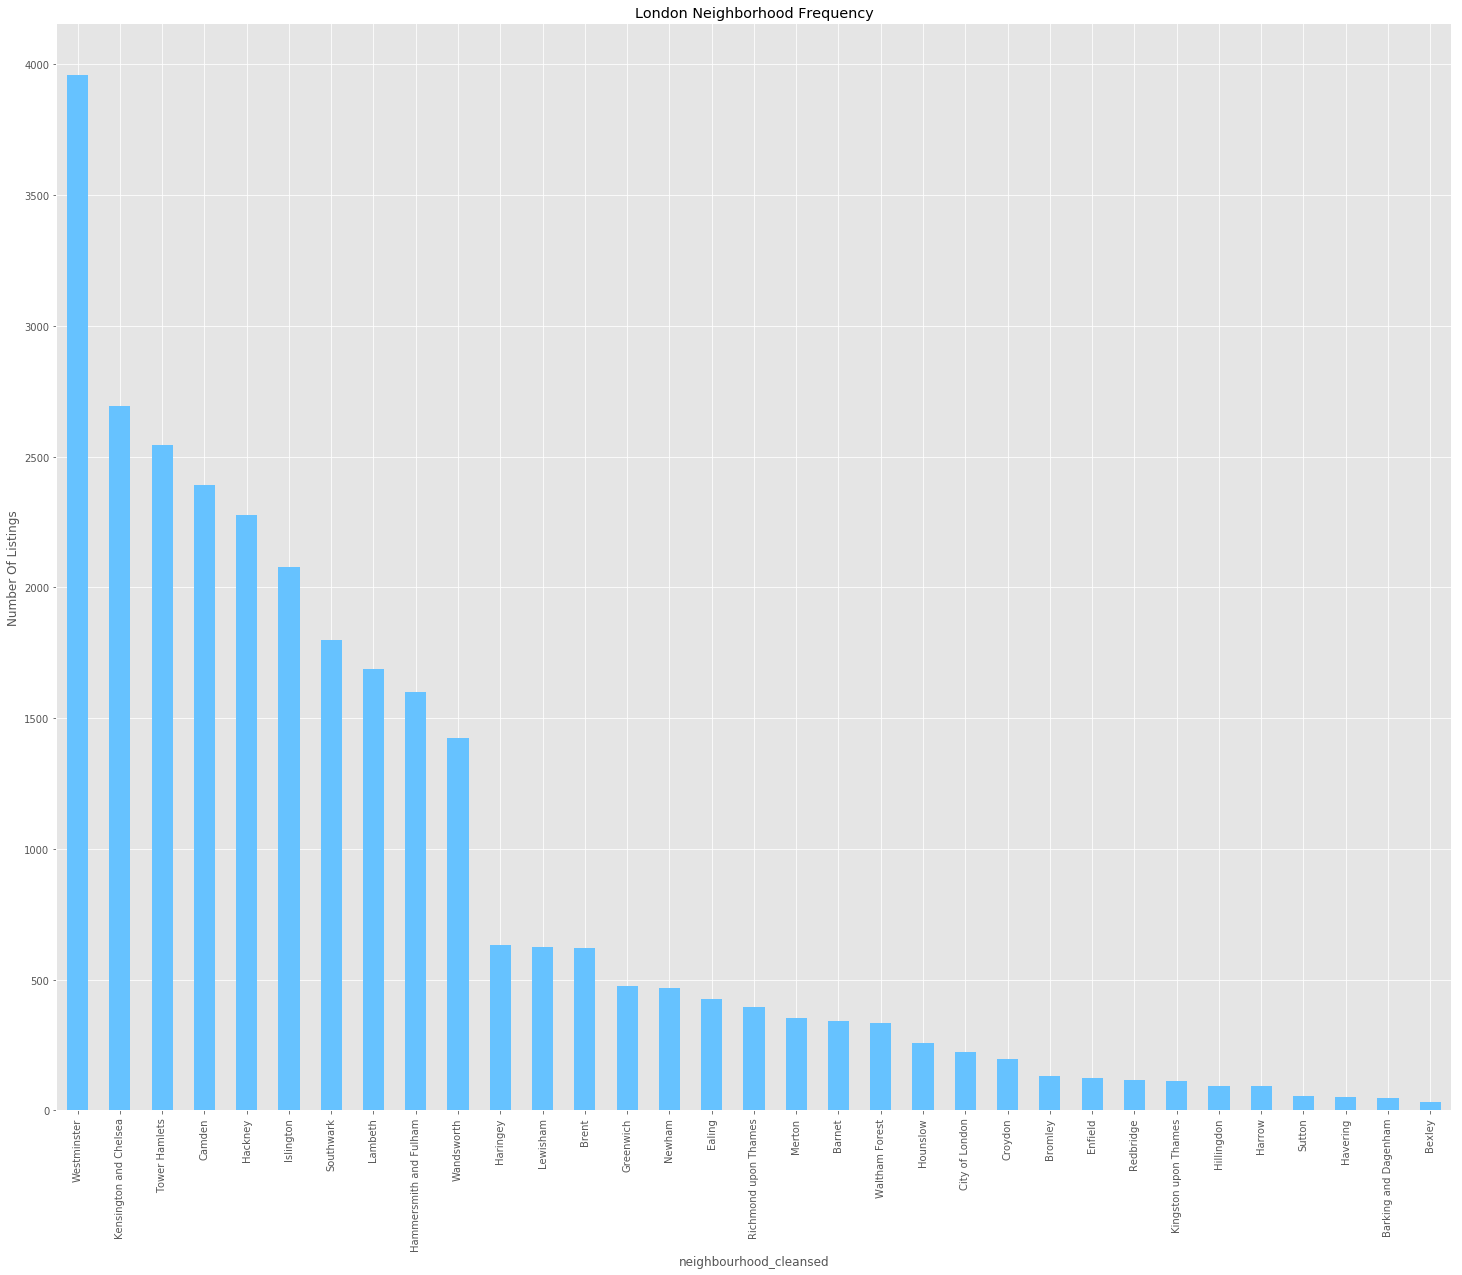

In [22]:
# visualizing the frequency of listings on the basis of neighbourhood where room type is entire apartment

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = neighbourhood_DF['neighbourhood_cleansed']
y_pos = neighbourhood_DF['Number_Of_Listings']

neighbourhood_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(25,20), 
           title = 'London Neighborhood Frequency', 
           legend = False)

plt.ylabel('Number Of Listings')
plt.savefig("London Neighborhood Frequency")

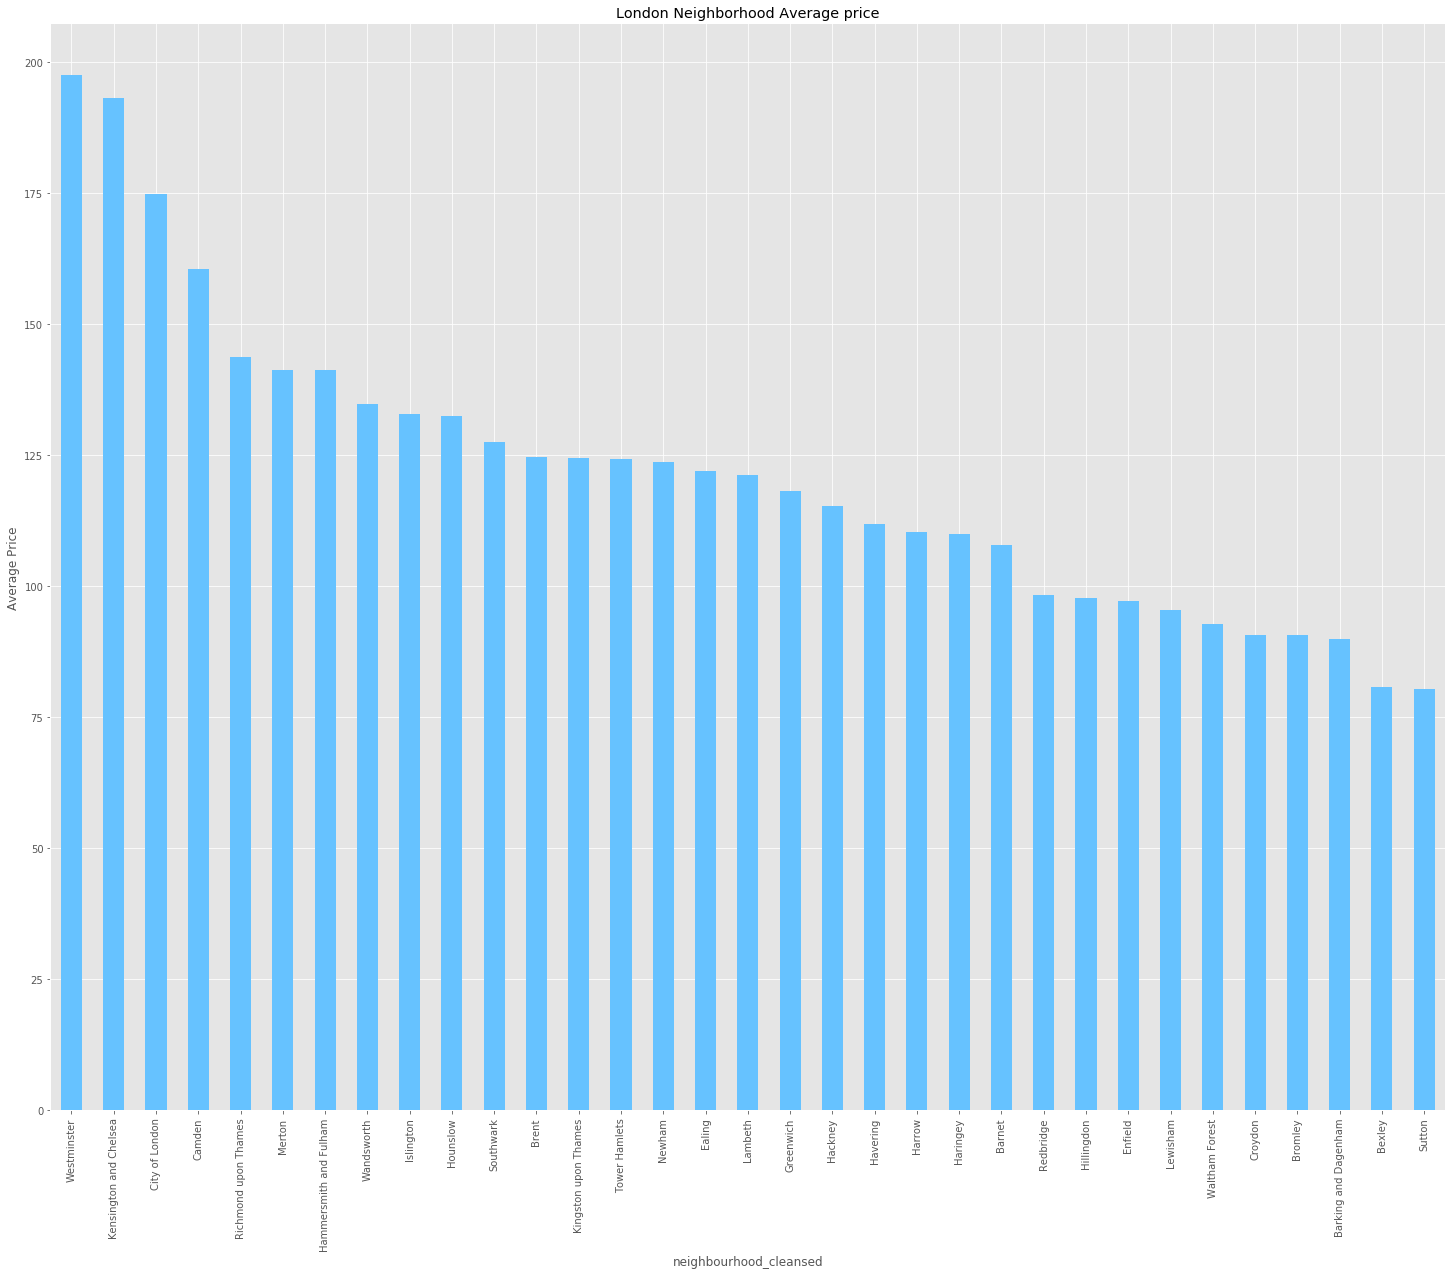

In [28]:
# Now lets visualize average price of these listings on the basis of neighbourhood where room type is entire apartment

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = neighbourhoodPrice_DF['neighbourhood_cleansed']
y_pos = neighbourhoodPrice_DF['Average_Price']

neighbourhoodPrice_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Average_Price',
           color = '#66c2ff', 
           figsize =(25,20), 
           title = 'London Neighborhood Average price', 
           legend = False)

plt.ylabel('Average Price')
plt.savefig("London Neighborhood Average price")

In [29]:
# Let's look at the differences between the words used in listings for Airbnb locations in different Boston neighborhoods

import re
import nltk
from nltk.corpus import stopwords
from collections import Counter

uniqueNeighborhoods = inputDF.neighbourhood_cleansed.unique().tolist()

#function to clean the data and compile a list of most common words
def cleanData(neighbrhood_name,descrip):
    p = re.sub('[^a-zA-Z]+',' ', descrip)
    cmn_words=['The','I','london','room']
    descrip_data=nltk.word_tokenize(p)
    filtered_data=[word.lower() for word in descrip_data if word not in cmn_words if word not in stopwords.words('english')] 
    wnl = nltk.WordNetLemmatizer() 
    counts=Counter([wnl.lemmatize(data) for data in filtered_data])
    commn_words=[]
    for w in counts.most_common(5):
        commn_words.append(w[0])
    return ' '.join(commn_words)

summ={}
for n in uniqueNeighborhoods:
    text=''
    for index,row in inputDF.iterrows():
        if row['neighbourhood_cleansed']==n:
            if ((row['description']!=0) & (row['space']!=0) & (row['neighborhood_overview']!=0)):
                text =text+row['description']+row['space']+row['neighborhood_overview']
    summ[n]=text

final_DF_neighbrhood=pd.DataFrame(columns=['neighborhood','top 5 words in description'])
for a in summ.items():
    top5words=cleanData(a[0],a[1])
    final_DF_neighbrhood=final_DF_neighbrhood.append(pd.Series([a[0],top5words],index=['neighborhood','top 5 words in description']),ignore_index=True)

final_DF_neighbrhood.to_csv('top_words_description.csv')

In [30]:
final_DF_neighbrhood.head()

,neighborhood,top 5 words in description
0,Westminster,london bedroom apartment walk bed
1,Wandsworth,bedroom london walk minute bed
2,Barnet,london minute bedroom walk house
3,Kensington and Chelsea,bedroom london apartment flat area
4,Tower Hamlets,london walk apartment bed bedroom
